In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [44]:
Data = pd.read_csv("distance_day_month_fare_data.csv")
Data.head()

,Distance_km,Day_of_Week,Month,Fare_price
0,37.454012,Wednesday,February,57.780894
1,95.071431,Tuesday,June,148.768414
2,73.199394,Tuesday,February,116.264454
3,59.865848,Wednesday,February,91.227016
4,15.601864,Sunday,February,37.731669


In [45]:
#preparing the data
Data["Distance_km"], Data["Fare_price"] = Data["Distance_km"].round(1), Data["Fare_price"].round(1)
Data.head()

,Distance_km,Day_of_Week,Month,Fare_price
0,37.5,Wednesday,February,57.8
1,95.1,Tuesday,June,148.8
2,73.2,Tuesday,February,116.3
3,59.9,Wednesday,February,91.2
4,15.6,Sunday,February,37.7


In [46]:
day_map = {
    "Monday":0,
    "Tuesday":1,
    "Wednesday":2,
    "Thursday":3,
    "Friday":4,
    "Saturday":5,
    "Sunday":6
}
month_map = {
    "January":0,
    "February":1,
    "March":2,
    "April":3,
    "May":4,
    "June":5,
    "July":6,
    "August":7,
    "September":8,
    "October":9,
    "November":10,
    "December":11
}
Data["Day_of_Week"] = Data["Day_of_Week"].map(day_map)
Data["Month"] = Data["Month"].map(month_map)
Data.head()

,Distance_km,Day_of_Week,Month,Fare_price
0,37.5,2,1,57.8
1,95.1,1,5,148.8
2,73.2,1,1,116.3
3,59.9,2,1,91.2
4,15.6,6,1,37.7


In [47]:
x1 = np.array(Data["Distance_km"])
x2 = np.array(Data["Day_of_Week"])
x3 = np.array(Data["Month"])
y = np.array(Data["Fare_price"])

In [48]:
def Error_calc(w1,w2,w3,b):
    m = np.size(x1)
    Total_error = 0
    for i in range(m):
        y_hat = (w1*x1[i]) +(w2*x2[i])+ (w3*x3[i])+ b
        error = math.pow((y_hat - y[i]), 2)
        Total_error+= error
    return Total_error/(2*m)



In [49]:
Error_calc(1.2,3.1,1.6,3)

91.81594300000006

In [50]:
def gradient_comp(w1,w2,w3,b):
    m = np.size(x1)
    dw1 = 0
    dw2 = 0
    dw3 = 0
    db  = 0
    for i in range (m):
        y_hat = (w1*x1[i]) +(w2*x2[i])+ (w3*x3[i])+ b
        error = y_hat - y[i]
        dw1 += ((error)*x1[i])/m
        dw2 += ((error)*x2[i])/m
        dw3 += ((error)*x3[i])/m
        db  += (error)/m
    return dw1,dw2,dw3,db  

In [51]:
def gradient_descent(learning_rate = 0.0001,iterations = 10000):
    w1 = 0.56
    w2 = 0.34
    w3 = 1.5
    b = 0.778
    for i in range(iterations):
        dw1,dw2,dw3,db = gradient_comp(w1,w2,w3,b)
        w1 = w1 - learning_rate * dw1
        w2 = w2 - learning_rate * dw2
        w3 = w3 - learning_rate * dw3
        b  = b -  learning_rate * db
        if i%1000 == 0:
            error = Error_calc(w1,w2,w3,b)
            print(f"the cost after iteration {i} is {error}")
    return w1,w2,w3,b    
    

In [52]:
ow1,ow2,ow3,ob = gradient_descent()

print(f"the optimized weights and biases are {ow1},{ow2},{ow3}, {ob}")

the cost after iteration 0 is 588.0125661767661
the cost after iteration 1000 is 13.511979064714597
the cost after iteration 2000 is 13.153129157290591
the cost after iteration 3000 is 13.075820109423272
the cost after iteration 4000 is 13.025848093085925
the cost after iteration 5000 is 12.98618248324352
the cost after iteration 6000 is 12.951155027934503
the cost after iteration 7000 is 12.918473746232563
the cost after iteration 8000 is 12.887198090983718
the cost after iteration 9000 is 12.856935520795078
the optimized weights and biases are 1.527168849921408,0.28938272482613014,0.25146570464637646, 1.2928824091383362


In [53]:
def predict_fare(x1,x2,x3):
    prediction = (ow1*x1+ ow2*x2+ ow3*x3+ ob).round(1)
    print(f"The predicted fare price is {prediction}")

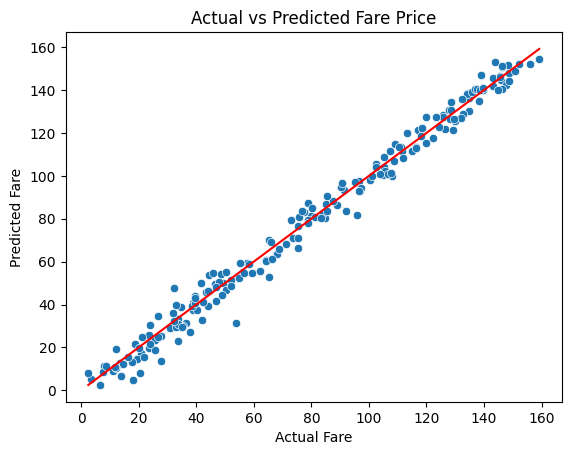

In [61]:
y_hat = ow1 * x1 + ow2 * x2 + ow3 * x3 + ob
sns.scatterplot(x=y, y=y_hat)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Price")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.show()

In [55]:
predict_fare(49,2,6)

The predicted fare price is 78.2
